###*Sayantan Mukherjee 60009220131 D2-2*

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import fashion_mnist


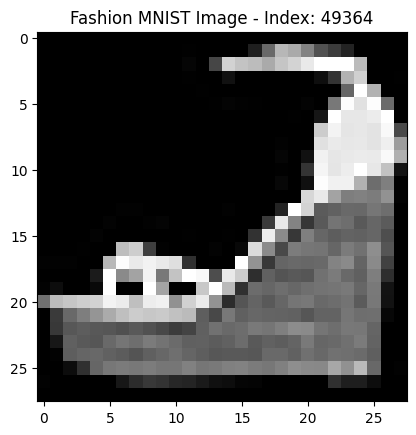

In [26]:
# Loading the Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Picking a random image.
idx = np.random.randint(0, train_images.shape[0])
img = train_images[idx]
plt.imshow(img, cmap='gray')
plt.title(f"Fashion MNIST Image - Index: {idx}")
plt.show()


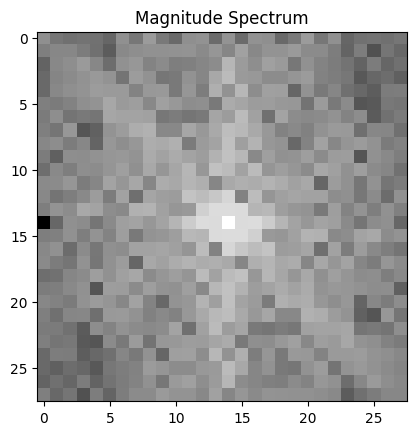

In [27]:
def fourier_transform(img):
    f_transform = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_shifted))
    return f_shifted, magnitude_spectrum

# Fourier transform of the image
f_shifted, magnitude_spectrum = fourier_transform(img)

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()


In [28]:
def ideal_low_pass_filter(img_shape, radius):
    rows, cols = img_shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), radius, 1, -1)
    return mask
low_pass_mask = ideal_low_pass_filter(img.shape, 10)


In [29]:
def apply_filter(f_shifted, filter_mask):
    return f_shifted * filter_mask

filtered_low_pass = apply_filter(f_shifted, low_pass_mask)


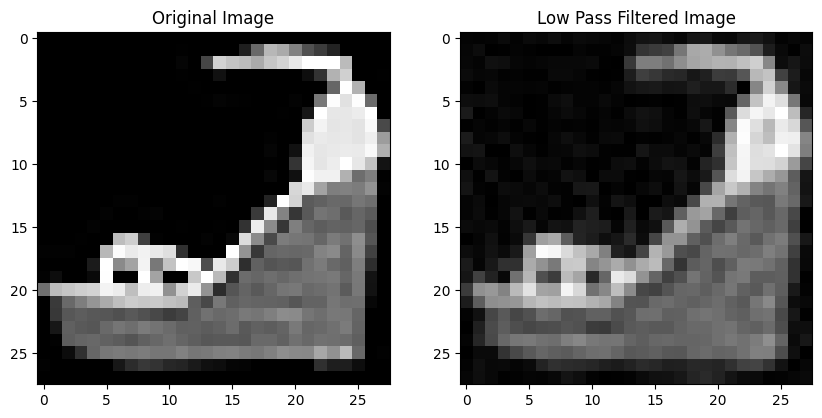

In [37]:
def inverse_fourier_transform(f_shifted):
    f_ishift = np.fft.ifftshift(f_shifted)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

# Inverse Fourier of filtered image
img_low_pass = inverse_fourier_transform(filtered_low_pass)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_low_pass, cmap='gray')
plt.title('Low Pass Filtered Image')

plt.show()


In [31]:
def ideal_high_pass_filter(img_shape, radius):
    return 1 - ideal_low_pass_filter(img_shape, radius)

high_pass_mask = ideal_high_pass_filter(img.shape, 10)
filtered_high_pass = apply_filter(f_shifted, high_pass_mask)


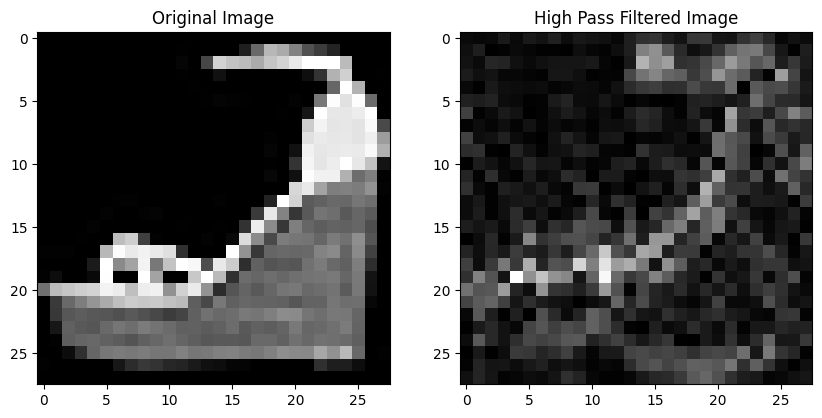

In [38]:
img_high_pass = inverse_fourier_transform(filtered_high_pass)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_high_pass, cmap='gray')
plt.title('High Pass Filtered Image')

plt.show()


In [33]:
def gaussian_low_pass_filter(img_shape, sigma):
    rows, cols = img_shape
    crow, ccol = rows // 2, cols // 2
    x = np.linspace(-ccol, ccol, cols)
    y = np.linspace(-crow, crow, rows)
    X, Y = np.meshgrid(x, y)
    mask = np.exp(-(X**2 + Y**2) / (2 * (sigma**2)))
    return mask

gaussian_low_pass_mask = gaussian_low_pass_filter(img.shape, 10)
filtered_gaussian_low = apply_filter(f_shifted, gaussian_low_pass_mask)


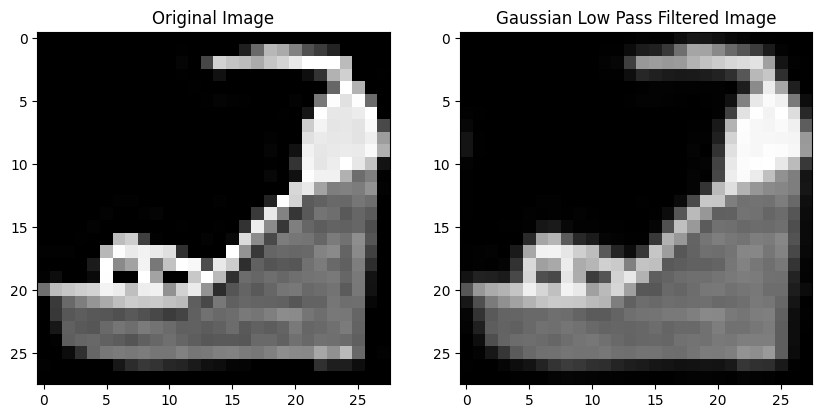

In [39]:
img_gaussian_low_pass = inverse_fourier_transform(filtered_gaussian_low)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_gaussian_low_pass, cmap='gray')
plt.title('Gaussian Low Pass Filtered Image')

plt.show()


In [35]:
def gaussian_high_pass_filter(img_shape, sigma):
    return 1 - gaussian_low_pass_filter(img_shape, sigma)

gaussian_high_pass_mask = gaussian_high_pass_filter(img.shape, 10)
filtered_gaussian_high = apply_filter(f_shifted, gaussian_high_pass_mask)


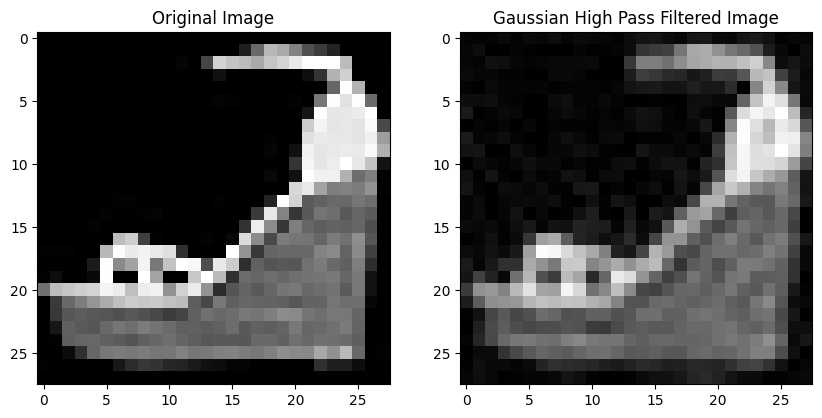

In [40]:
img_gaussian_high_pass = inverse_fourier_transform(filtered_gaussian_high)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(img_low_pass, cmap='gray')
plt.title('Gaussian High Pass Filtered Image')

plt.show()


###*Conclusion:*

###Fourier Transform:

*I manually implemented the 2D Fourier Transform using numpy.fft to convert the spatial domain image into the frequency domain, allowing us to analyze the image's frequency components. The transformation helps in understanding the low and high-frequency details of the image.*

*An Ideal Low Pass Filter was created using a circular mask to retain only the low-frequency components*

*An Ideal High Pass Filter was created by inverting the low-pass mask, allowing high-frequency components (edges and details) to pass through*

*Inverse Fourier Transform was used to convert the frequency domain back to the spatial domain, reconstructing the filtered images. This allowed us to observe the effects of filtering in both low-pass and high-pass cases.*

##Final Observation:

###*Low Pass Filtering blurs the image, removing high-frequency details, which is useful in denoising or reducing image sharpness.*

###*High Pass Filtering enhances edges and fine details, which is often used for edge detection or sharpening.*

###*Gaussian Filters provide a smoother transition between the frequency components compared to Ideal Filters, which can result in more natural-looking modifications.*